In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter

sns.set(style="whitegrid")


In [4]:
BASE_PATH = "/content/drive/MyDrive/nsynth_proccessed_dataset/train"

X = np.load(f"{BASE_PATH}/X.npy")
y = np.load(f"{BASE_PATH}/y.npy")

with open("/content/drive/MyDrive/nsynth_proccessed_dataset/class_mapping.json", "r") as f:
    class_mapping = json.load(f)

# Reverse mapping: id → class name
id_to_class = {v: k for k, v in class_mapping.items()}

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Number of classes:", len(id_to_class))


X shape: (12000, 128, 128)
y shape: (12000,)
Number of classes: 8


/tmp/ipython-input-9167922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="viridis")


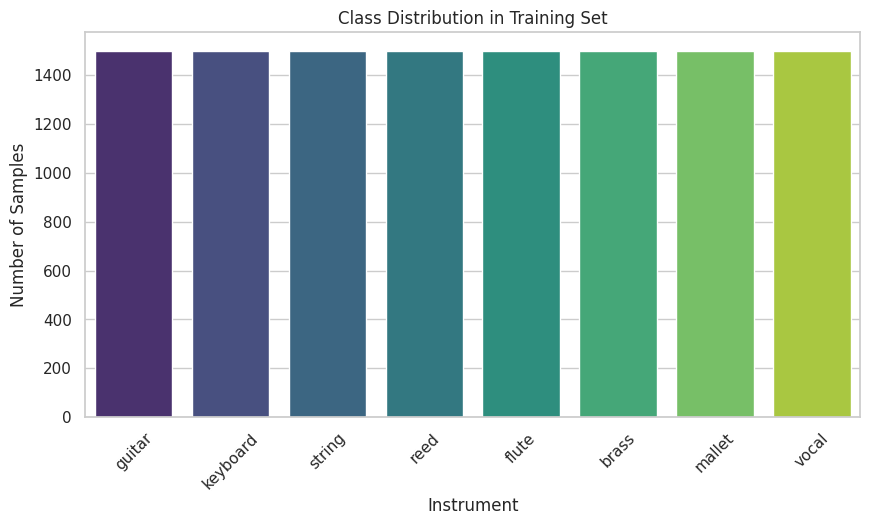

In [6]:
class_counts = Counter(y)

labels = [id_to_class[i] for i in class_counts.keys()]
counts = list(class_counts.values())

plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=counts, palette="viridis")
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Samples")
plt.xlabel("Instrument")
plt.xticks(rotation=45)
plt.show()


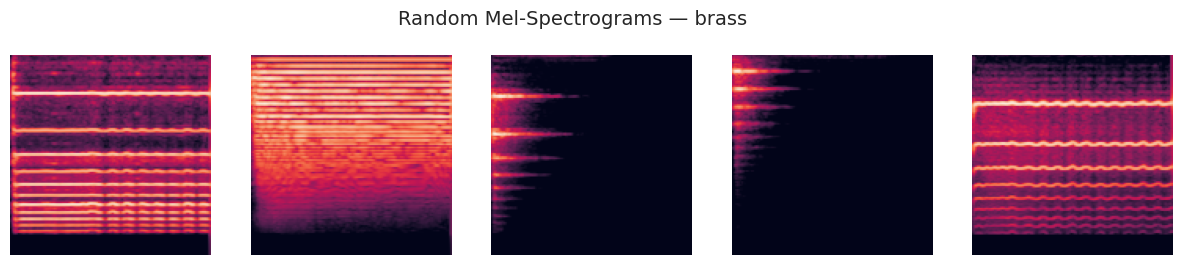

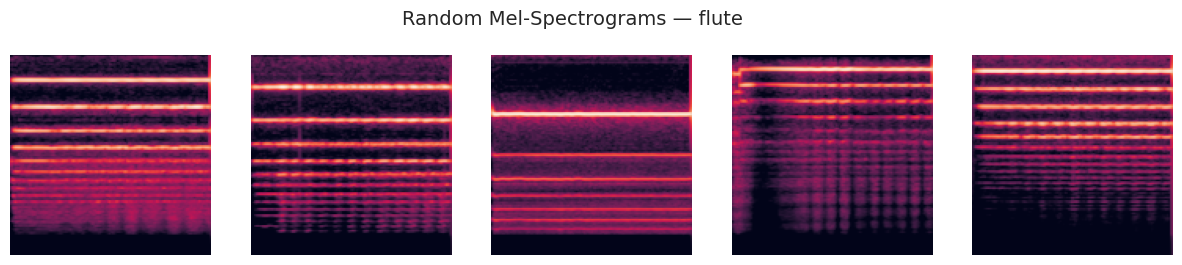

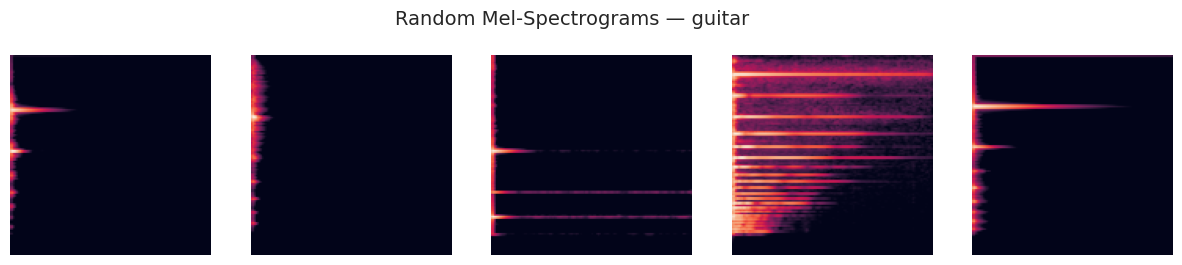

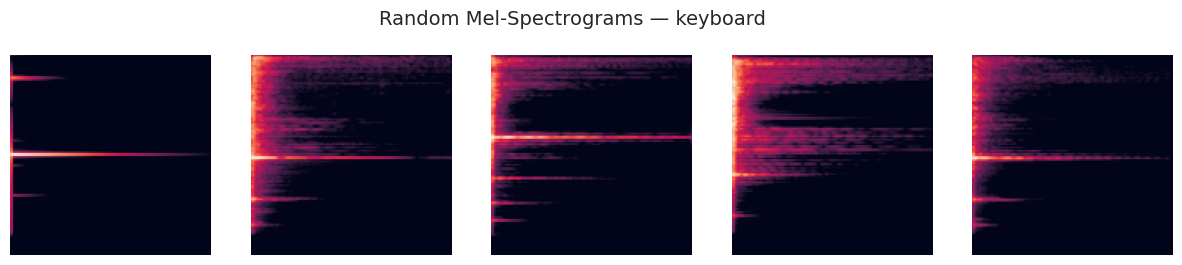

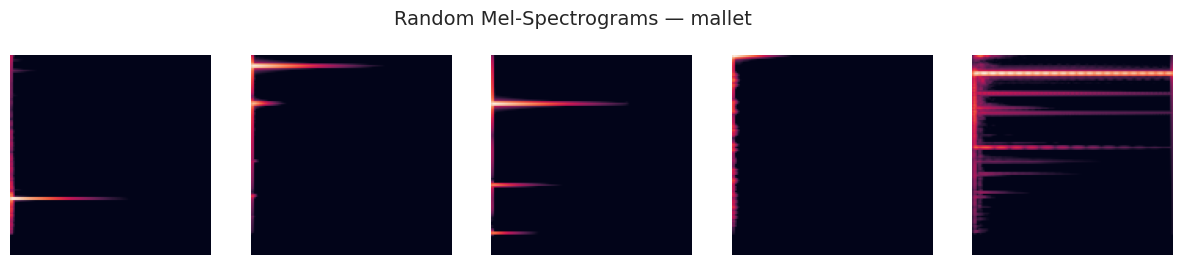

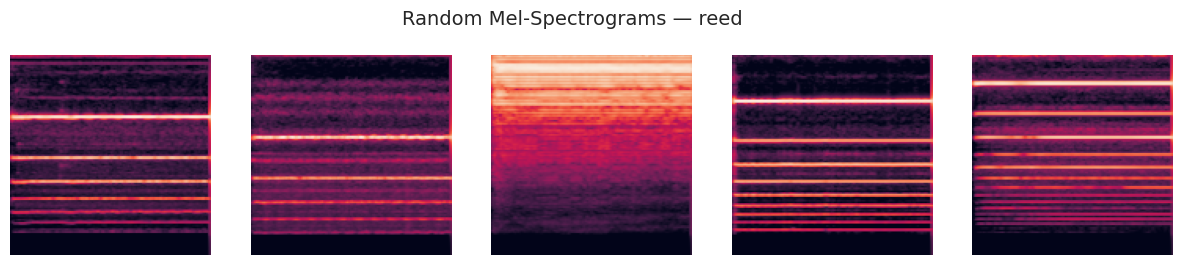

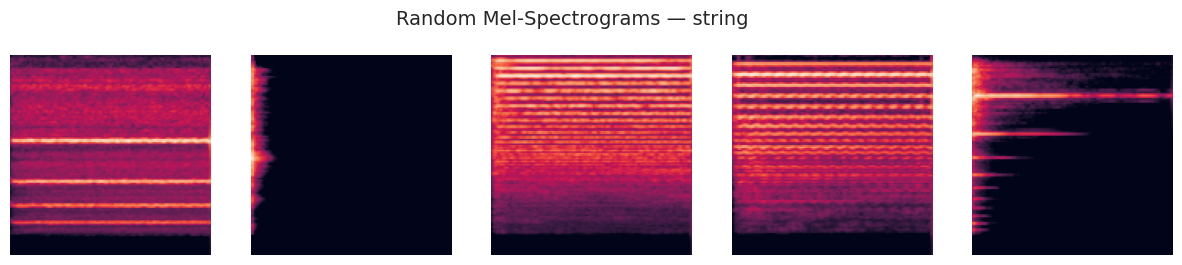

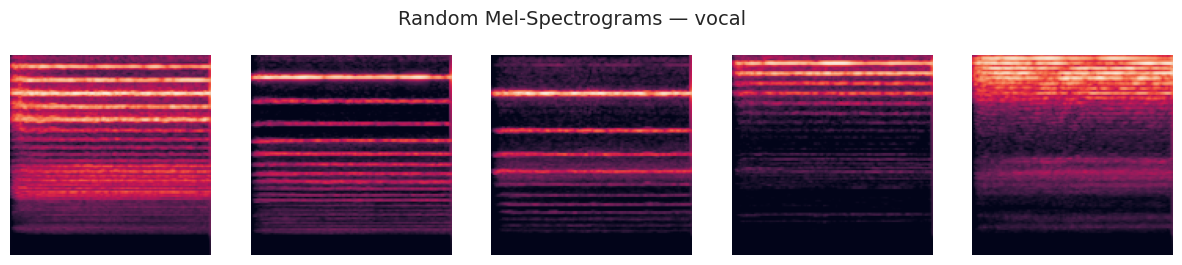

In [7]:
NUM_SAMPLES = 5

for class_id, class_name in id_to_class.items():
    indices = np.where(y == class_id)[0]

    if len(indices) == 0:
        continue

    chosen = random.sample(list(indices), min(NUM_SAMPLES, len(indices)))

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(chosen):
        plt.subplot(1, NUM_SAMPLES, i + 1)
        plt.imshow(X[idx])
        plt.axis("off")

    plt.suptitle(f"Random Mel-Spectrograms — {class_name}", fontsize=14)
    plt.show()


In [8]:
print("Global statistics:")
print("Min value:", X.min())
print("Max value:", X.max())
print("Mean value:", X.mean())
print("Std deviation:", X.std())


Global statistics:
Min value: -80.0
Max value: -2.682209e-07
Mean value: -65.285095
Std deviation: 18.99223


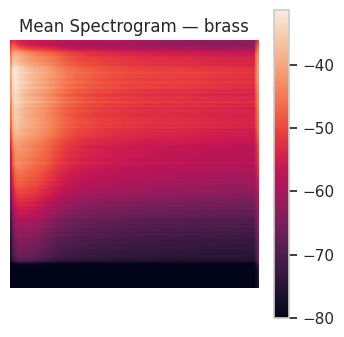

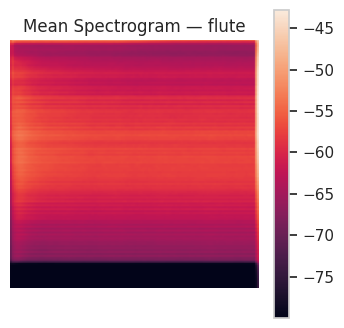

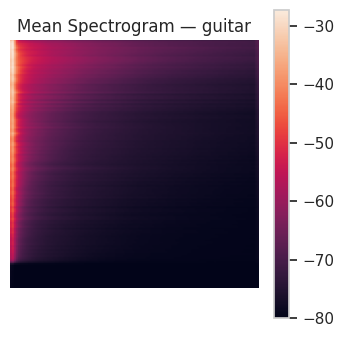

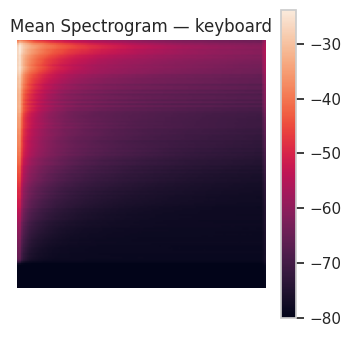

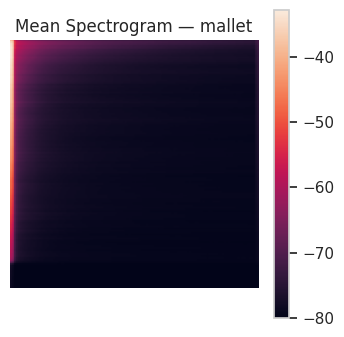

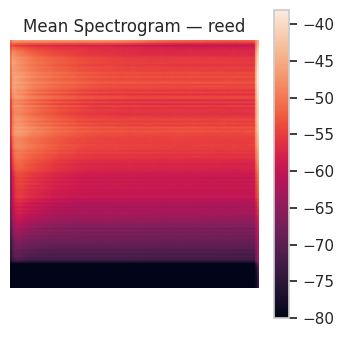

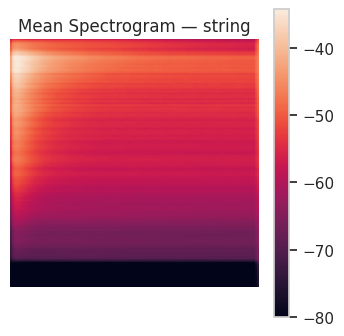

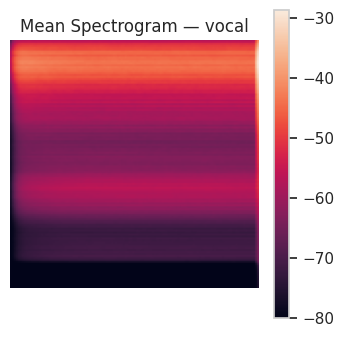

In [9]:
for class_id, class_name in id_to_class.items():
    class_indices = np.where(y == class_id)[0]
    if len(class_indices) == 0:
        continue

    mean_spec = np.mean(X[class_indices], axis=0)

    plt.figure(figsize=(4, 4))
    plt.imshow(mean_spec)
    plt.title(f"Mean Spectrogram — {class_name}")
    plt.colorbar()
    plt.axis("off")
    plt.show()
